In [1]:
import numpy as np
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from math import log, sqrt, exp, pi, cos
import scipy as scipy

### Generamos los valores aceptados del ejercicio 4

In [2]:
N = 100000 # muestras aceptadas a obtener
MU = 25
DESV = 2

# como vamos a generar normales(0,1), podemos usar el método de
# aceptacion y rechazo con una exponencial(1)
def fexp(t):
    return exp(-t)

# usamos funcion densidad normal(0,1), luego transformaremos a N(25,4)
# mediante la inversa del método de normalización de normales
def fnorm(t):
    return exp(-((t**2)/2))/(sqrt(2*pi))

# el c resultante para generar N(0,1) desde EXP(1)
c = sqrt(2*exp(1)/pi)

# los valores aceptados a guardar
simulated_normal = []
i = 0
necesarios = 0

# como una normal X se estandariza a una Z~N(0,1) con Z=(X-μ)/σ entonces X=Z*σ+μ
while(i < N):
    necesarios += 1
    randexp = np.random.exponential(1)
    rand1 = np.random.uniform()
    rand2 = np.random.uniform()
    
    if(rand1 < (fnorm(randexp) / (c*fexp(randexp)))):
        if(rand2 > 0.5):
            simulated_normal.append(randexp * DESV + MU)
        else:
            simulated_normal.append(-randexp * DESV + MU)
        i += 1

### Ahora si, procedemos con el ejercicio 7

In [3]:
simulated_normal.sort() # ordenamos en forma ascendente así no usamos explicitamente
# la funcion acumulada empírica de nuestra muestra Fn(x)

ALPHA = 0.01 # nivel de significacion

def F(x): # acumulada de distribucion teórica esperada
    return scipy.stats.norm.cdf(x, MU, DESV)

In [4]:
j = 0
DesvPorAbajo = []
for xj in simulated_normal:
    j = j + 1
    DesvPorAbajo.append((j/N)-F(xj))

In [5]:
j = 0
DesvPorArriba = []
for xj in simulated_normal:
    j = j + 1
    DesvPorArriba.append(F(xj)-((j-1)/N))

In [6]:
KnMayor = sqrt(N) * np.max(DesvPorAbajo)
KnMenor = sqrt(N) * np.max(DesvPorArriba)

K = np.max([KnMayor, KnMenor])

print(K)

0.6526686237958872


In [7]:
valorCritico = sqrt(-((log(ALPHA/2))/2))
valorCritico

1.6276236307187293

### Como K=0.6526686237958872 < 1.6276236307187293=Kα
    Aceptamos (no rechazamos) la hipótesis de que la distribución generada en el ejercicio 4 correspondía a una N~(25,4)

In [8]:
python_normal = np.random.normal(MU, DESV, size = N)

[(19, 30)]

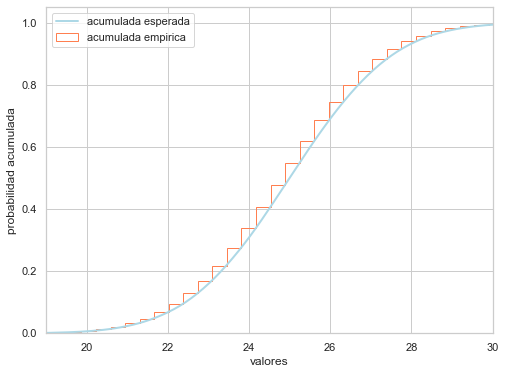

In [22]:
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

sns.distplot(simulated_normal, kde_kws={'visible':False}, hist_kws={'cumulative':True,'histtype':'step', 'alpha':1}, color="coral", label="acumulada empirica")
plot = sns.kdeplot(python_normal, cumulative=True, linewidth=2, alpha=1, color="lightblue", label="acumulada esperada")

plt.ylabel('probabilidad acumulada')
plt.xlabel('valores')
plt.legend()
plot.set(xlim=(19, 30))